In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# **Question - 1**

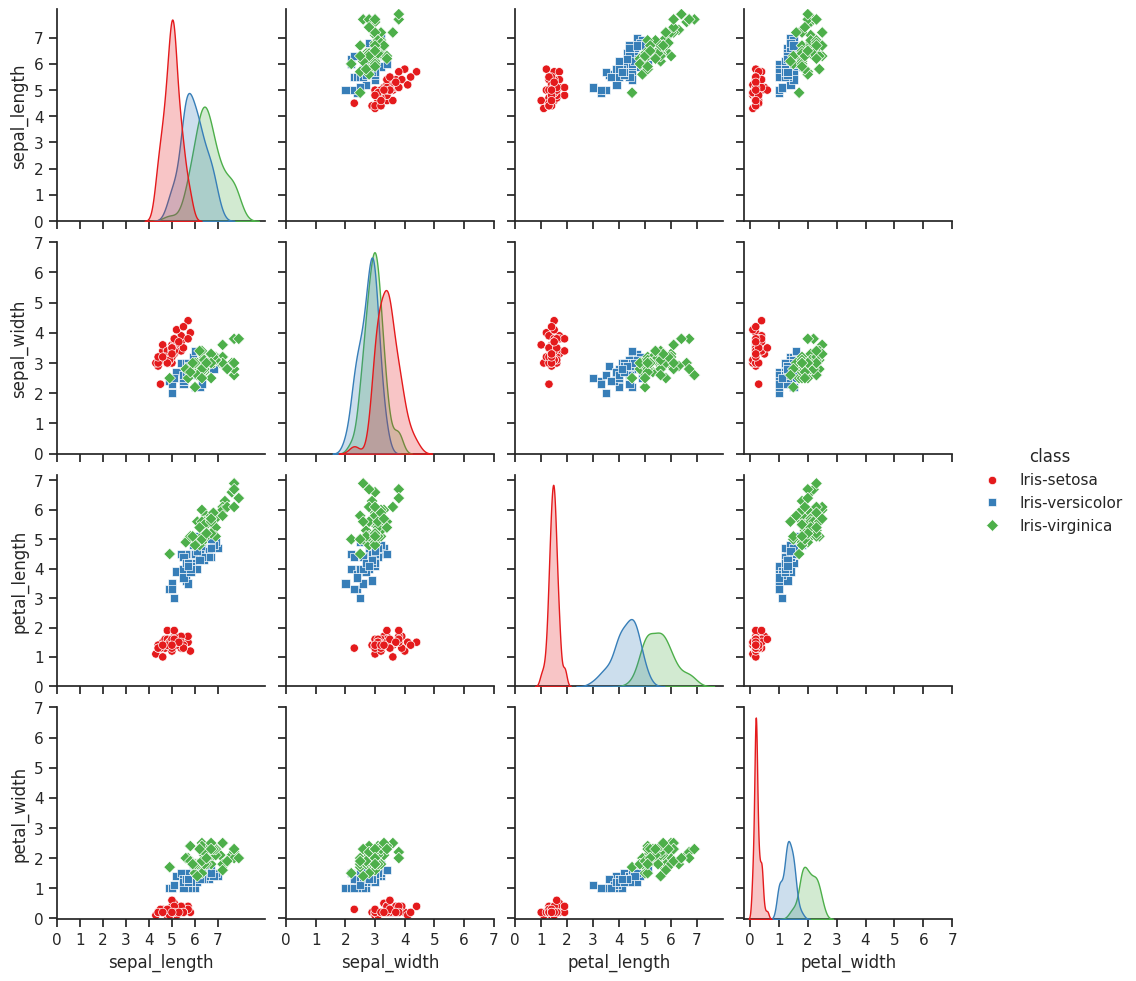

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_data = pd.read_csv(url, names=column_names)

sns.set(style="ticks")
scatter_plot = sns.pairplot(iris_data, kind="scatter", diag_kind="kde", hue='class', palette='Set1', markers=['o', 's', 'D'])

axes = scatter_plot.axes

max_value = iris_data.select_dtypes(include='float64').values.max()

for ax in axes.flatten():
    ax.set_xticks(range(0, int(max_value) + 1))
    ax.set_yticks(range(0, int(max_value) + 1))

plt.show()

# **Question - 2**

Scatter plots between the attributes

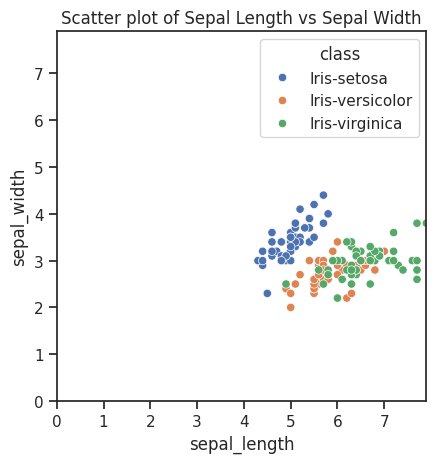

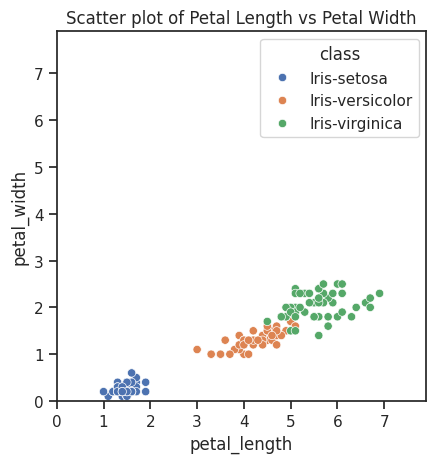

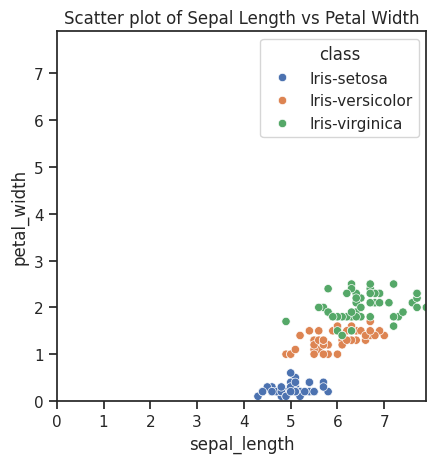

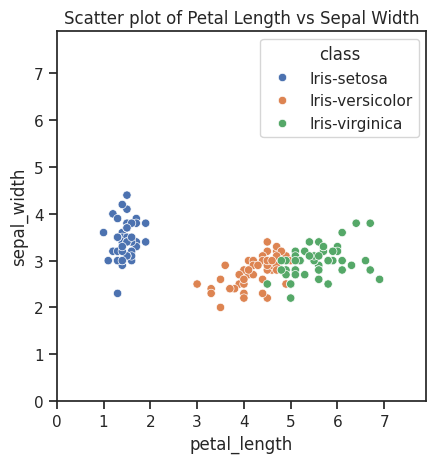

In [3]:
max_value = iris_data.drop(columns='class').values.max()

sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris_data)
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=iris_data)
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

sns.scatterplot(x='sepal_length', y='petal_width', hue='class', data=iris_data)
plt.title('Scatter plot of Sepal Length vs Petal Width')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

sns.scatterplot(x='petal_length', y='sepal_width', hue='class', data=iris_data)
plt.title('Scatter plot of Petal Length vs Sepal Width')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**We can see from the above plots that the Iris-setosa class can be linearly seperated from the remaining two classes.**

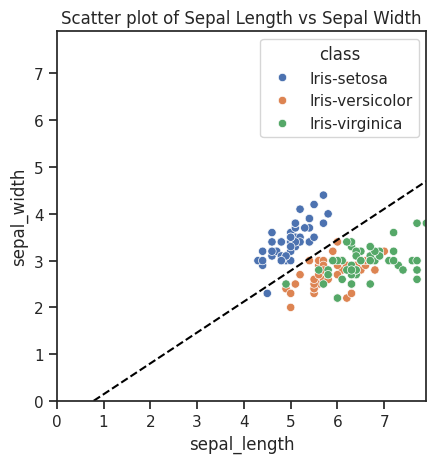

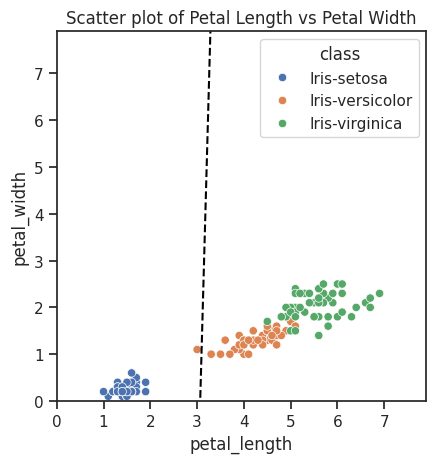

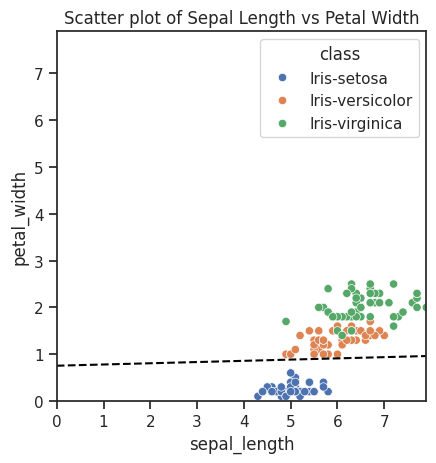

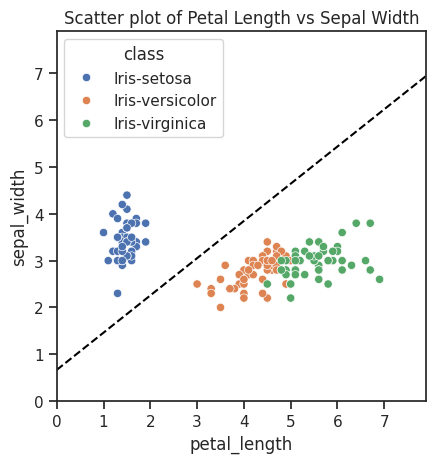

In [4]:
max_value = iris_data.drop(columns='class').values.max()

def plot_with_separating_line(x_feature, y_feature, title):
    sns.scatterplot(x=x_feature, y=y_feature, hue='class', data=iris_data)
    plt.title(title)

    # Fit LDA model to separate iris-setosa from other classes
    X = iris_data[[x_feature, y_feature]]
    y = (iris_data['class'] == 'Iris-setosa').astype(int)  
    lda = LDA()
    lda.fit(X, y)

    w = lda.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, max_value)
    yy = a * xx - (lda.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle='--', color='black')

    plt.xlim(0, max_value)
    plt.ylim(0, max_value)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_with_separating_line('sepal_length', 'sepal_width', 'Scatter plot of Sepal Length vs Sepal Width')
plot_with_separating_line('petal_length', 'petal_width', 'Scatter plot of Petal Length vs Petal Width')
plot_with_separating_line('sepal_length', 'petal_width', 'Scatter plot of Sepal Length vs Petal Width')
plot_with_separating_line('petal_length', 'sepal_width', 'Scatter plot of Petal Length vs Sepal Width')

# **Question - 3**

In [5]:
df = pd.read_csv("/content/WineQT.csv")

In [6]:
wine_data = pd.read_csv("/content/WineQT.csv")

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

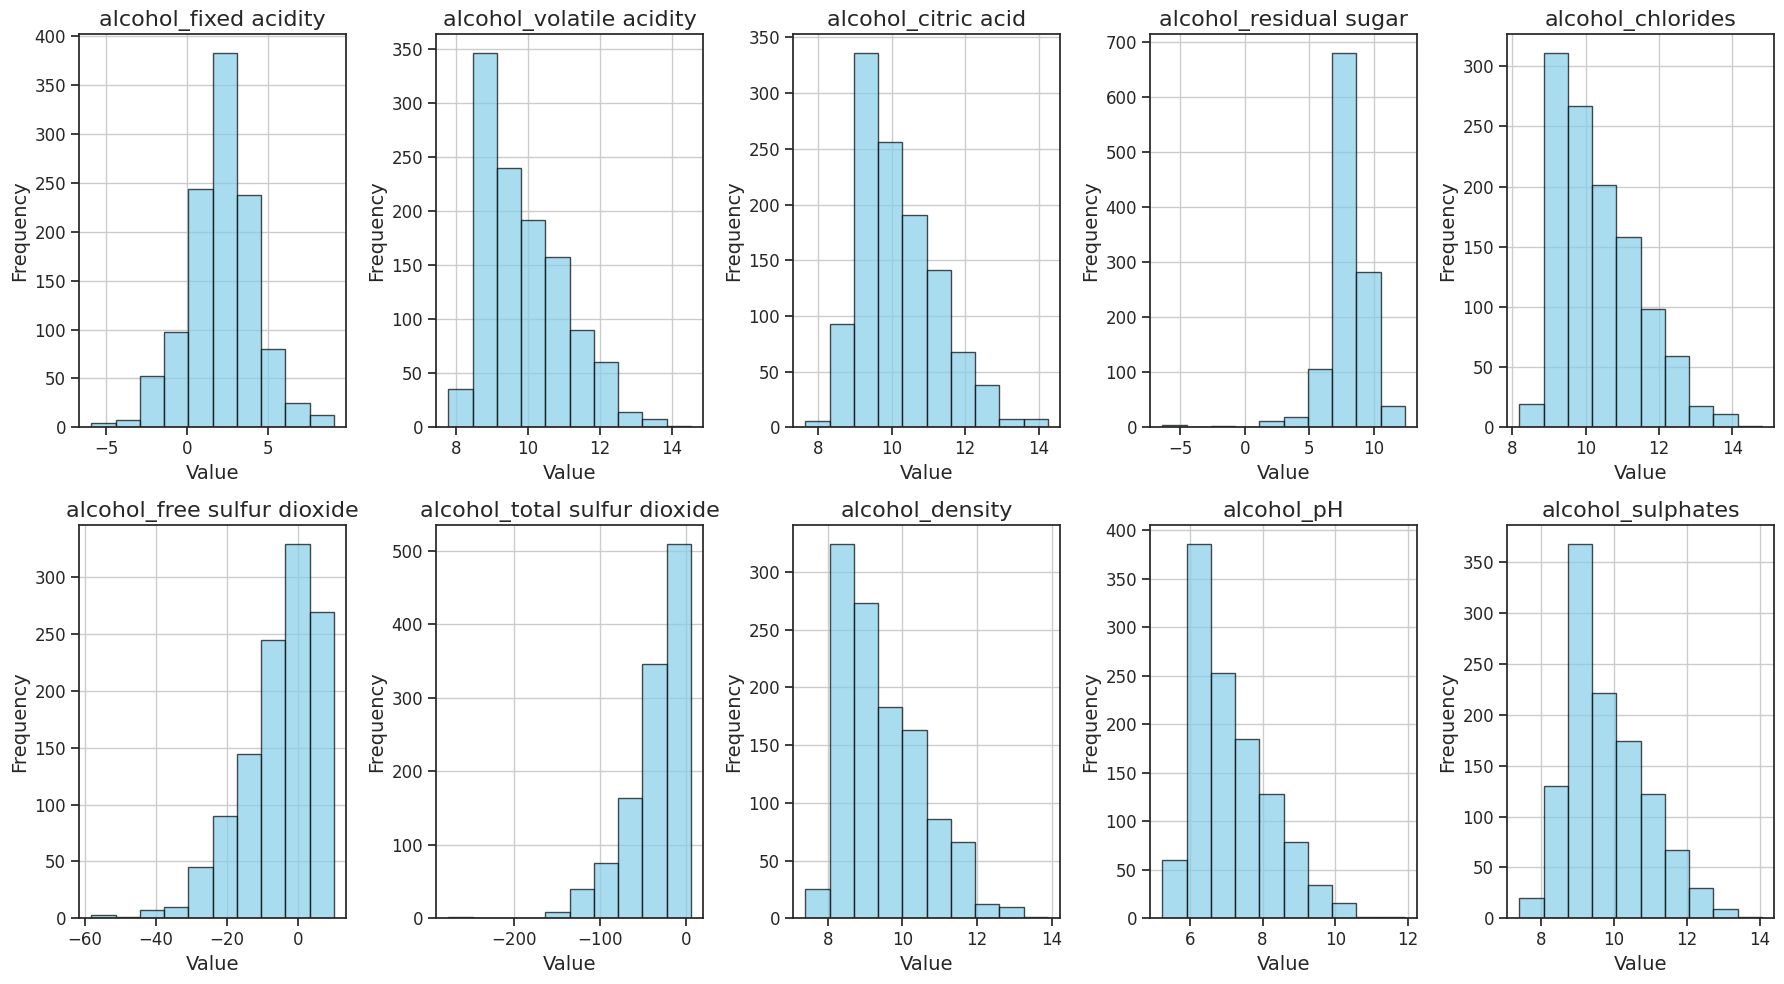

In [9]:
synthetic_features = ['alcohol_fixed acidity', 'alcohol_volatile acidity', 'alcohol_citric acid', 'alcohol_residual sugar',
                      'alcohol_chlorides', 'alcohol_free sulfur dioxide', 'alcohol_total sulfur dioxide', 'alcohol_density',
                      'alcohol_pH', 'alcohol_sulphates']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(synthetic_features, start=1):
    if 'alcohol' in feature:
        df[feature] = df['alcohol'] - df[feature.split('_')[1]]
    plt.subplot(2, 5, i)
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{feature}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

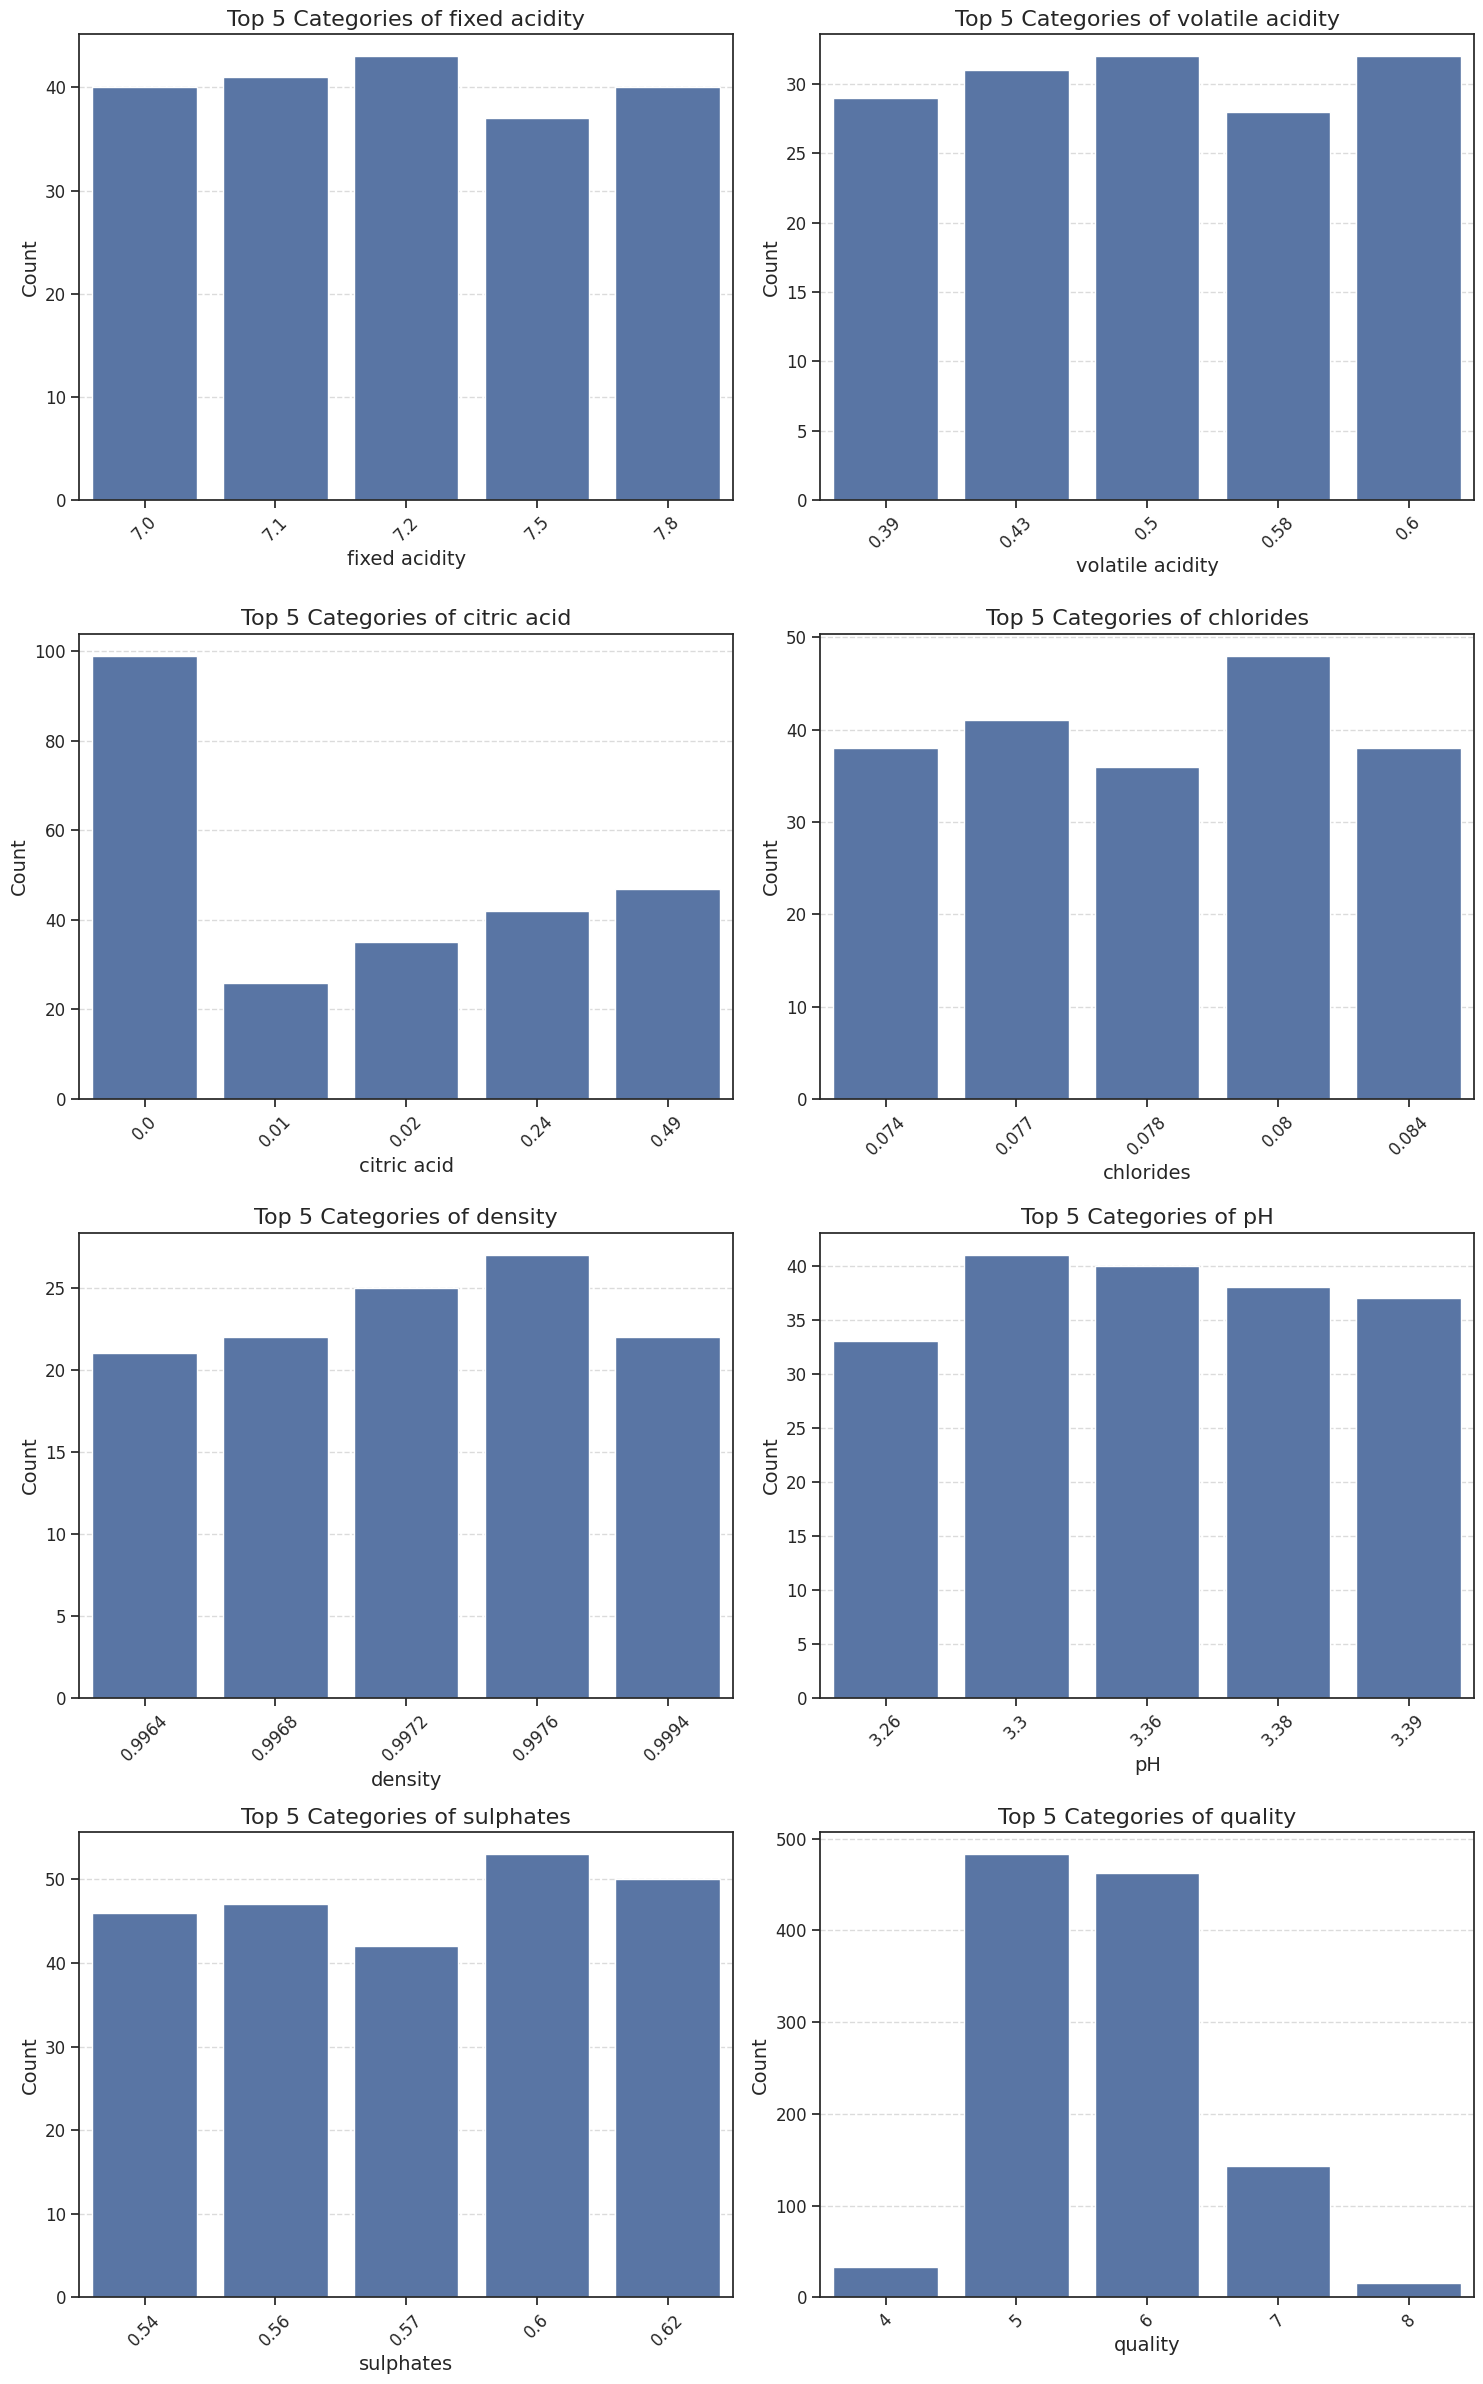

In [10]:
categorical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                        'density', 'pH', 'sulphates', 'quality']

plt.figure(figsize=(15, 24))
for i, feature in enumerate(categorical_features, start=1):
    top_categories = df.groupby(feature).size().nlargest(5).index

    df_top = df[df[feature].isin(top_categories)]

    plt.subplot(4, 2, i)
    sns.countplot(x=feature, data=df_top)
    plt.title(f'Top 5 Categories of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
sns.set_style("whitegrid")

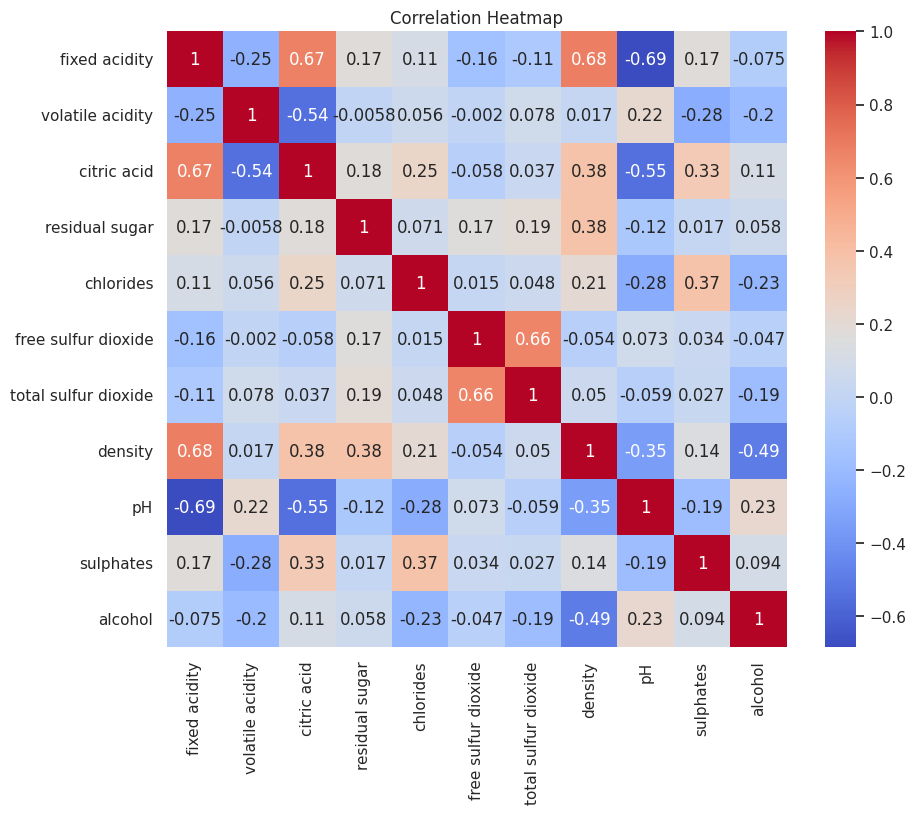

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = wine_data.iloc[:, :-2].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

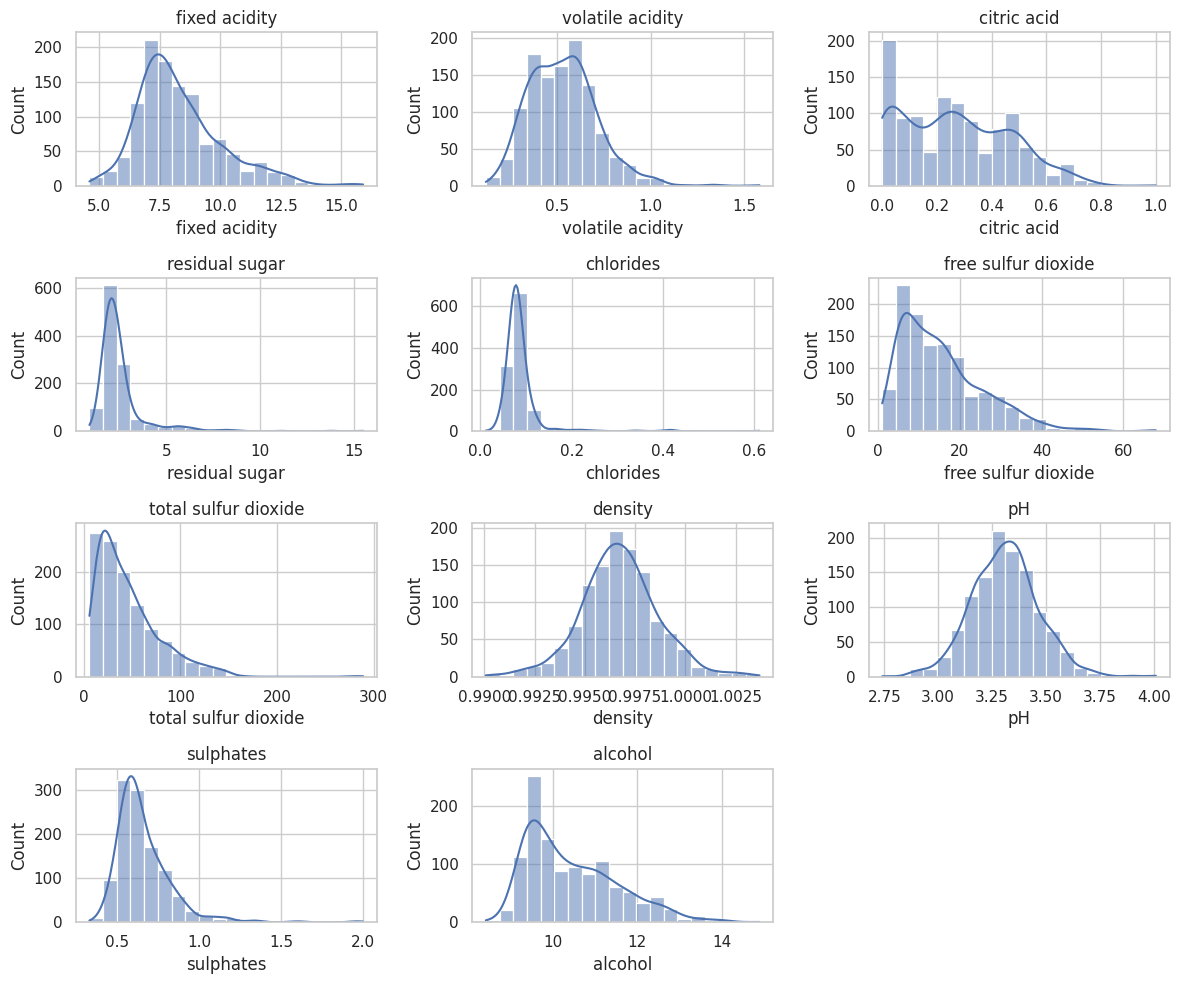

In [13]:
# Histograms for numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(wine_data.columns[:-2], 1):  
    plt.subplot(4, 3, i)
    sns.histplot(wine_data[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

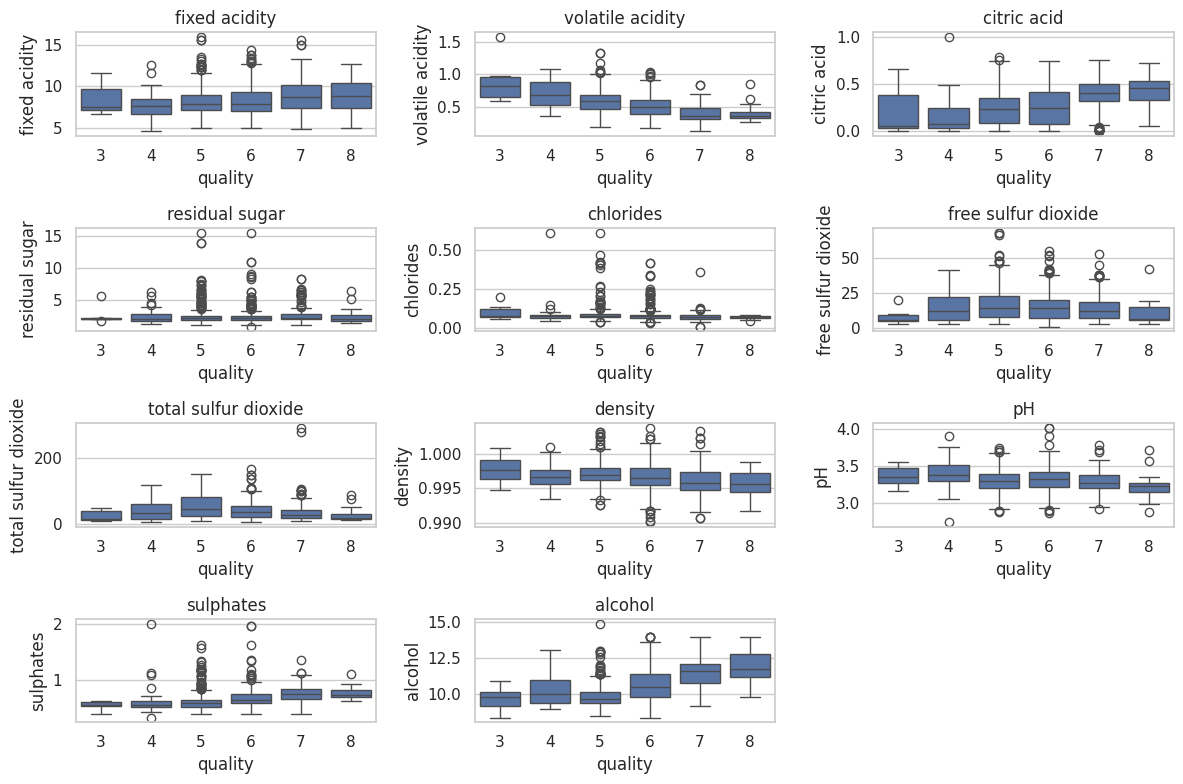

In [14]:
# Box plots for numerical features grouped by 'quality'
plt.figure(figsize=(12, 8))
for i, col in enumerate(wine_data.columns[:-2], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='quality', y=col, data=wine_data)
    plt.title(col)
plt.tight_layout()
plt.show()

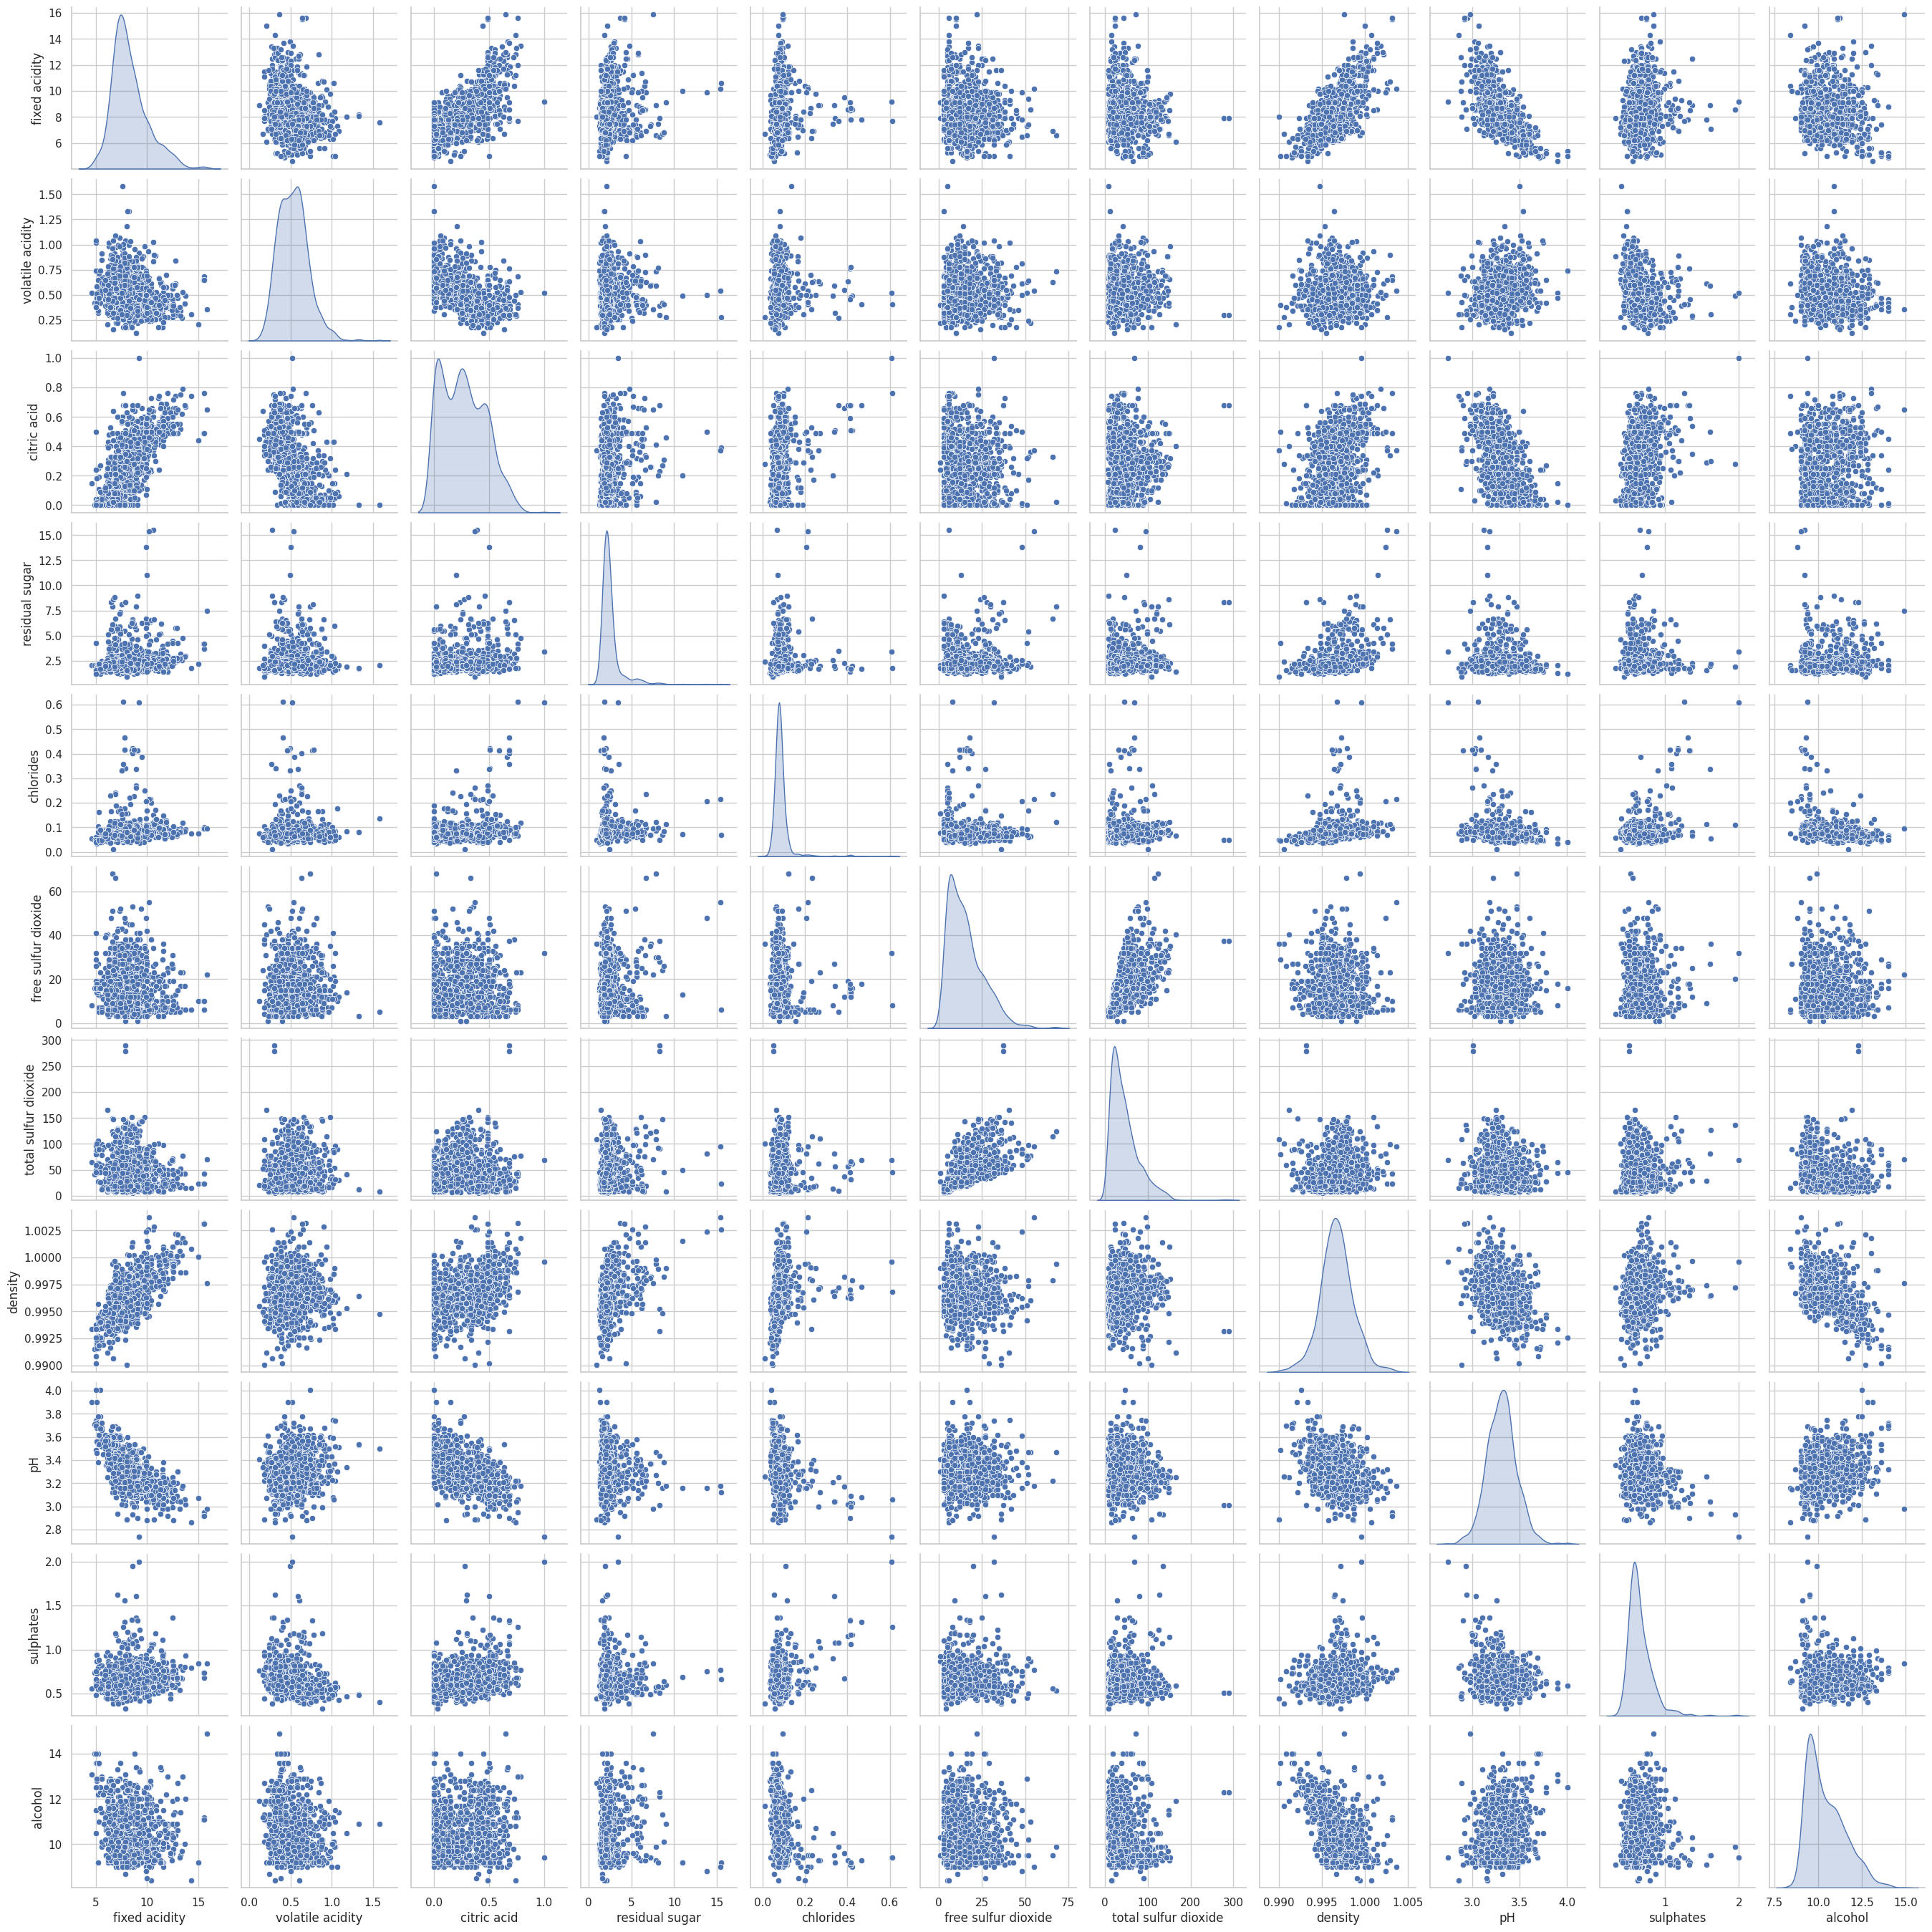

In [15]:
# Scatter plots for pairs of numerical features
sns.pairplot(wine_data.iloc[:, :-2], diag_kind='kde')
plt.show()

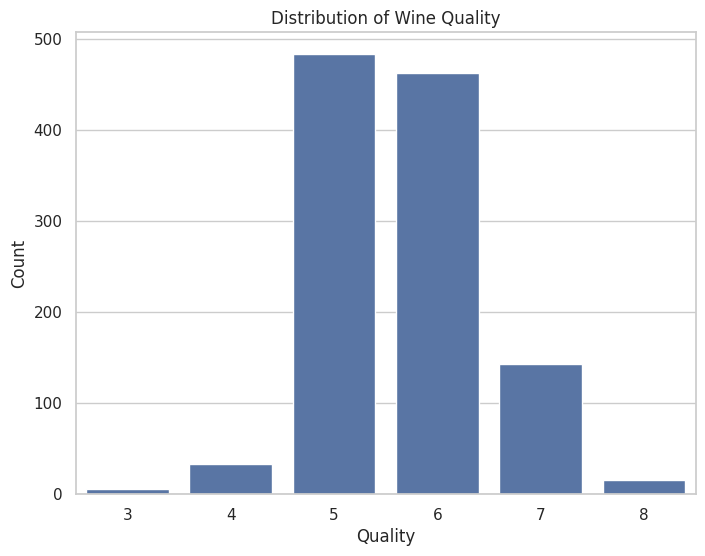

In [16]:
# Bar plot for 'quality' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

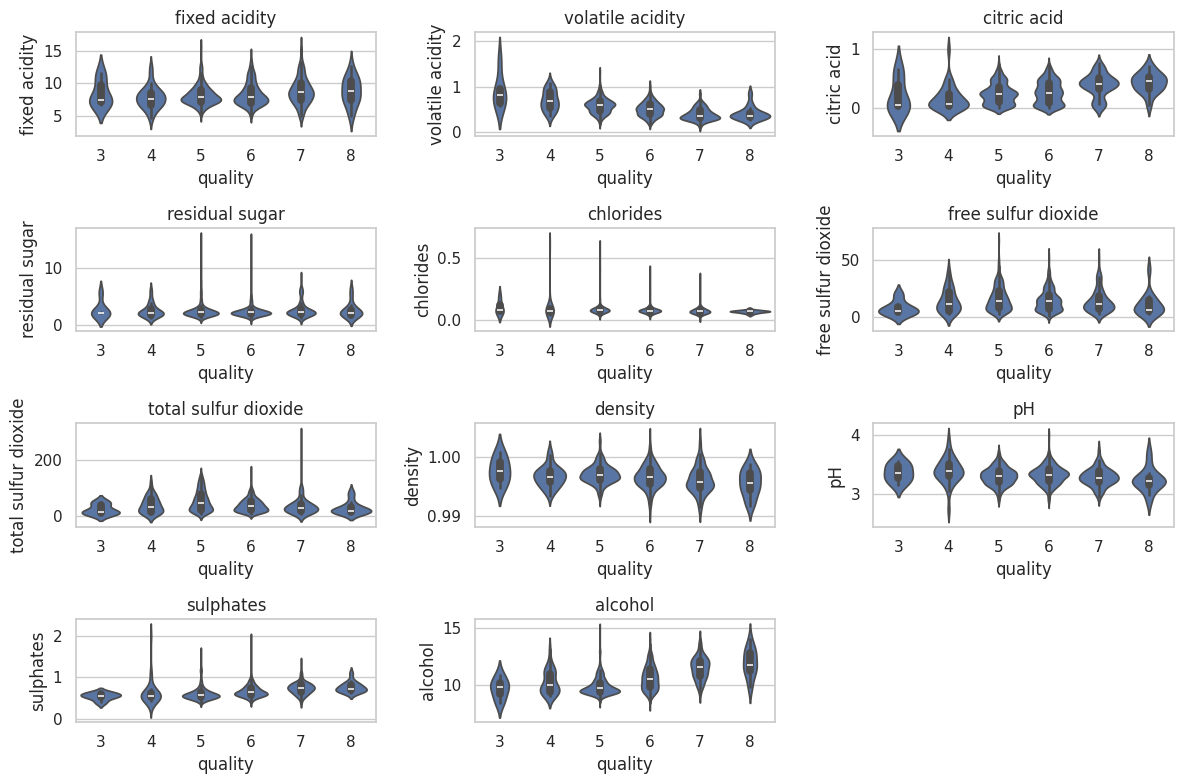

In [17]:
# Violin plots for numerical features grouped by 'quality'
plt.figure(figsize=(12, 8))
for i, col in enumerate(wine_data.columns[:-2], 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x='quality', y=col, data=wine_data)
    plt.title(col)
plt.tight_layout()
plt.show()

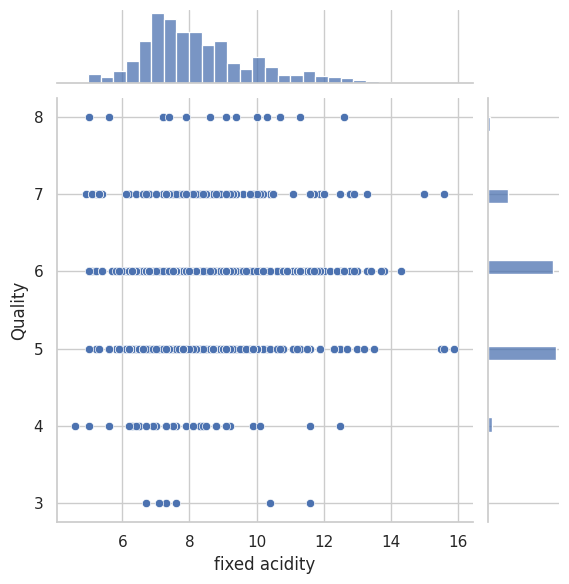

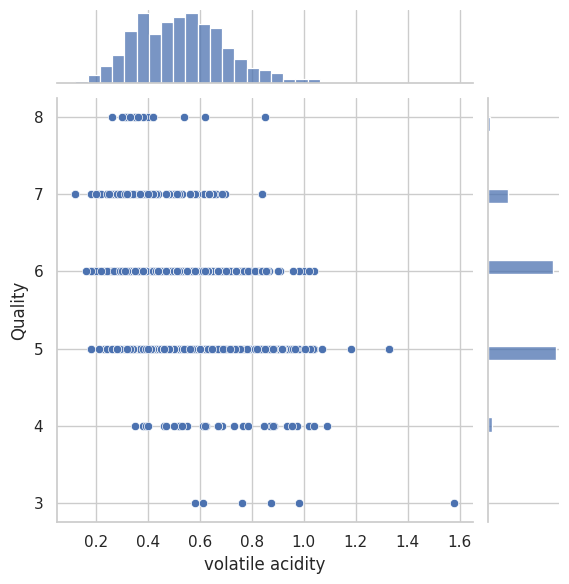

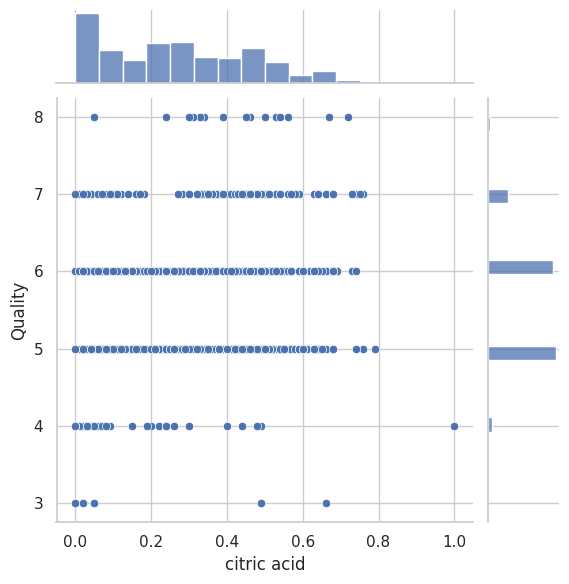

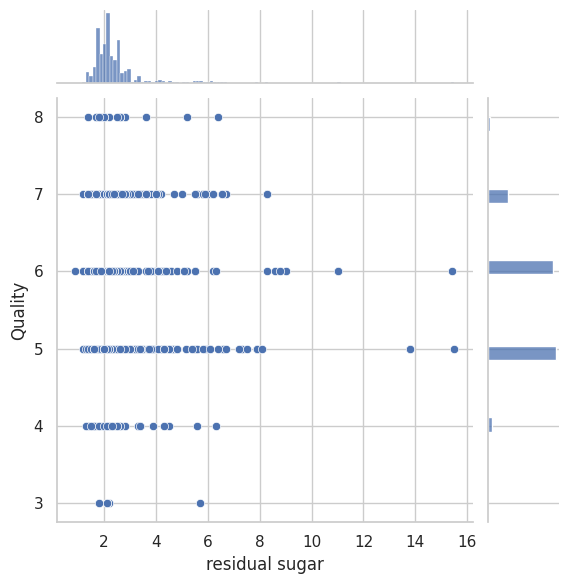

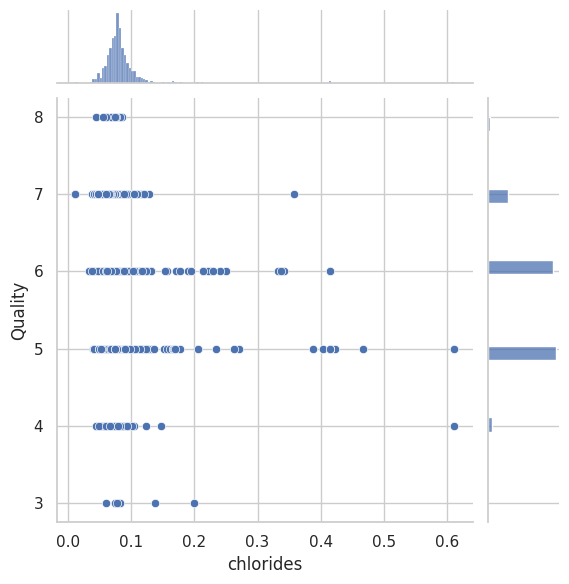

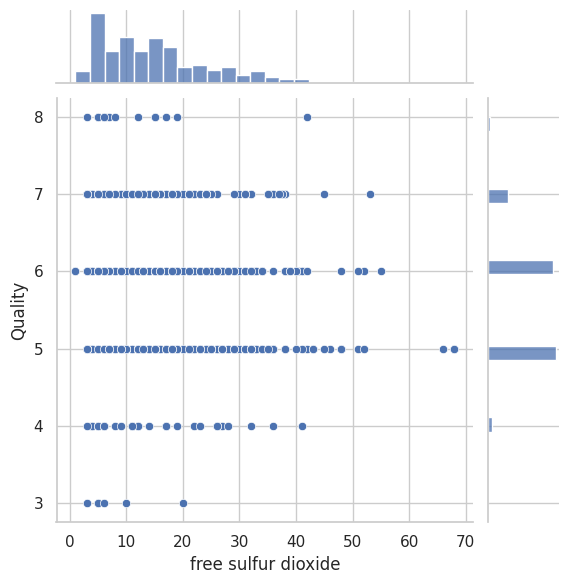

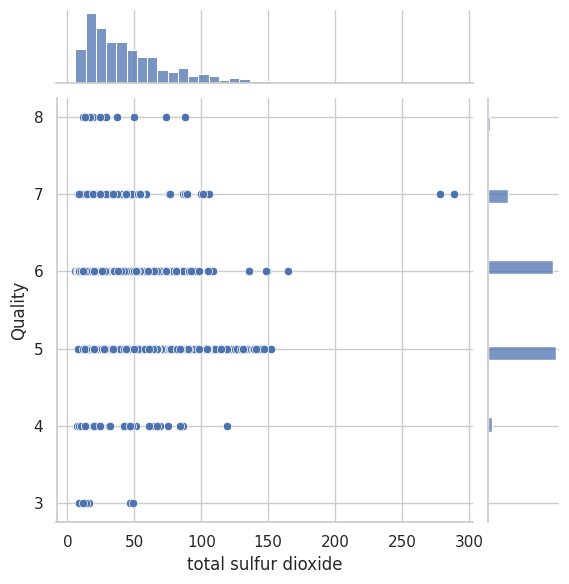

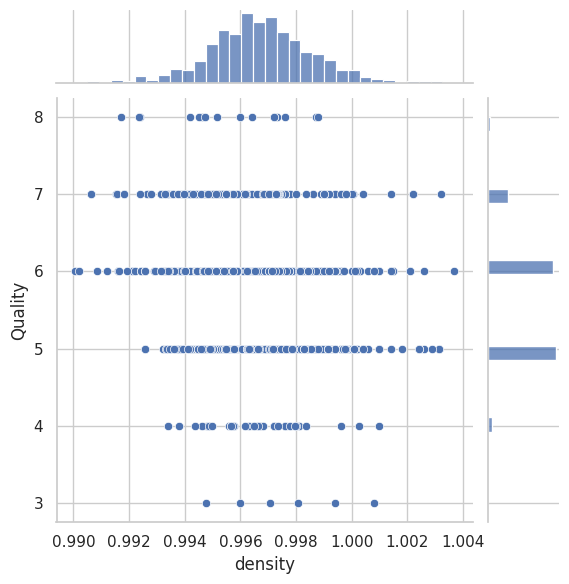

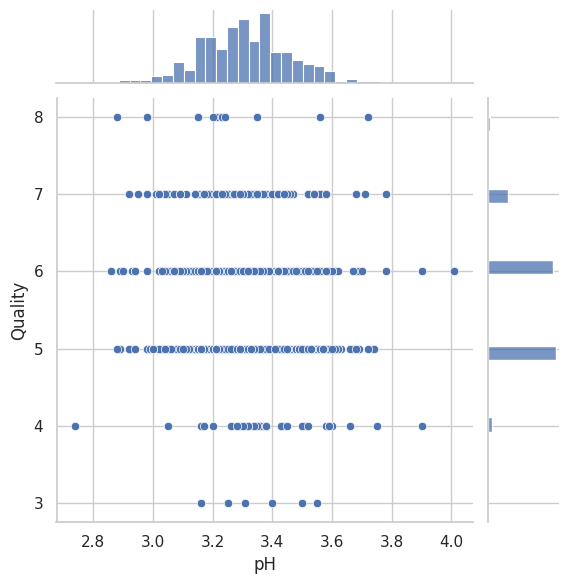

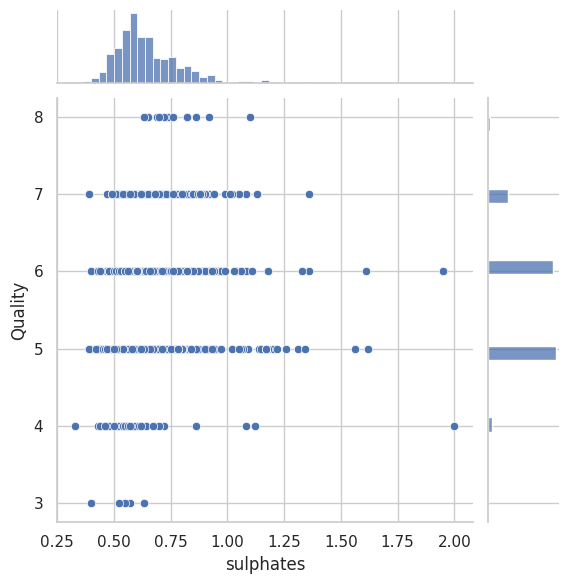

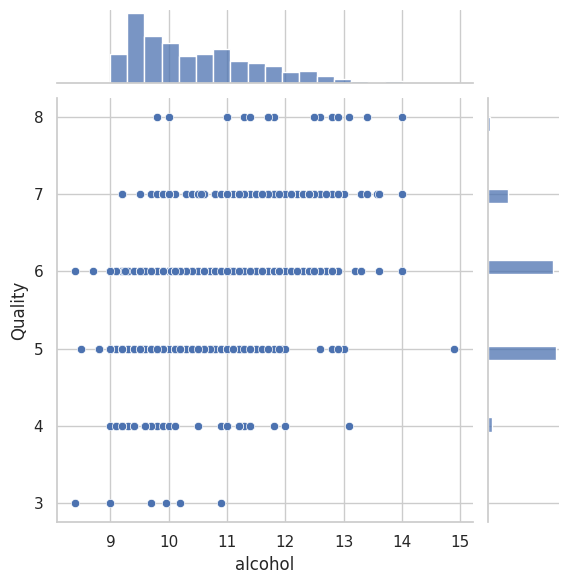

In [18]:
# Joint plots for pairs of numerical features
for col in wine_data.columns[:-2]:
    sns.jointplot(x=col, y='quality', data=wine_data, kind='scatter')
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.show()